# Programming Exercise 3A: Two-Compartment Model

In this exercise, we will study a model consisting of only two compartments. This reduction makes it easier to understand the role that the compartmental-model parameters play. Since we have already implemented an N-compartment model on the last exercise sheet, we can reuse most of the code.

In particular, consider the following circuit:
![](rc_circuit_compartments_small.png)
The equations governing the system are given by
$$
C_m \frac{\text{d} V_1}{\text{d} t} + \frac{V_1 - E_m}{R_m} - I_e = \frac{V_2 - V_1}{R_a},
$$
and
$$
C_m \frac{\text{d} V_2}{\text{d} t} + \frac{V_2 - E_m}{R_m} = \frac{V_1 - V_2}{R_a}.
$$
We can easily verify that we can treat the system using our code from the last exercise sheet by appending a sealed-end compartment to both sides of our system; the sealed ends have the same voltage as their respective neighbours, meaning that there is no axial current between the "inner" compartments and the end compartments. Then the two inner compartments fulfill the differential equations given above.

Hence we end up with a model consisting of four compartments, where $V(0,t) = V(1,t)$ and $V(3,t) = V(2,t)$, and the compartments with indices $1$ and $2$ are "surrounded compartments".

For inital parameter values, set $E_m = 0V$, $C_m = 75pF$, $R_m = 265M\Omega$, and $R_a = 7M\Omega$. Let $N$ denote the number of compartments.

<div class="alert alert-block alert-success">
<b>Task:</b> Initialize the model parameters.
</div>

In [1]:
# Import the standard libraries
import numpy as np
import matplotlib.pyplot as plt

### YOUR CODE HERE ###

# Initialize model parameters
E_m = 0.0  # Resting potential in volts
C_m = 75e-12  # Membrane capacitance in farads (75 pF)
R_m = 265e6  # Membrane resistance in ohms (265 MΩ)
R_a = 7e6  # Axial resistance in ohms (7 MΩ)
N = 4  # Total number of compartments (2 inner + 2 sealed ends)

### YOUR CODE HERE ###

On the last exercise sheet, we already wrote a function that performs a step of an Euler approximation for a surrounded compartment in a multi-compartment model. In case you had trouble with the exercise, the function is pre-implemented here. Feel free to use your own function from last week instead!

In [2]:
def surrounded_compartment_step(V, I_e, compartment_index, E_m, C_m, R_m, R_a, delta_t):
    '''Implements a step of the Euler approximation for a non-boundary compartment

    Args:
        V: np.array of length N containing the voltages before taking the Euler step
        I_e: np.array of length N containg the input current before taking the Euler step
        compartment_index: Compartment to be updated in the step
        E_m: Resting potential
        R_m: Membrane resistance
        R_a: Axial resistance
        delta_t: Time constant for the Euler approximation

    Returns:
        np.array of length N containing the voltages after updating compartment compartment_index
    '''

    V_here = V[compartment_index]
    V_left = V[compartment_index - 1]
    V_right = V[compartment_index + 1]
    dV_dt = ((E_m - V_here) / R_m + (V_right - V_here) / R_a + (V_left - V_here) / R_a + I_e[compartment_index]) / C_m
    # Compute the voltage after the step
    V[compartment_index] = V_here + delta_t * dV_dt

    return V

First, let's study the voltage response to a rectangular input current defined by
$$
I_e(t) = 
\begin{cases}
0, & (t < t_e) \vee (t_s \leq t) \vee (j\neq j_e) \\
I_0, & (t_e \leq t < t_s) \wedge (j = j_e)
\end{cases},
$$
with $t_e = 0.4s$, $t_s = 0.44s$, $I_0 = -100pA$ and $j_e = 1$.
We use $0$ as starting index, so compartment $1$ will be the $2$nd one. We assume that at $t=0$, both compartments are at resting potential (i.e. V(0) = 0).

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the function rectangle_input() to implement the input function above. Then implement the necessary parameters.
</div>

In [3]:
def rectangle_input(t, N, input_compartment, I_0):
    '''Implements the step-input function.

    Args:
        t: Time in miliseconds
        N: Number of compartments in the model
        input_compartment: Compartment in which the current is injected
        I_0: The value of the input current

    Returns:
        The input current at a given time as a np.array of length N
    '''

    ### YOUR CODE HERE ###
    
    I_e = np.zeros(N)  # Initialize input current array
    t_e = 0.4  # Start time for input current
    t_s = 0.44  # Stop time for input current
    for i in range(N):
        if (t_e <= t < t_s) and (i == input_compartment):
            I_e[i] = I_0  # Apply input current to the specified compartment
    return I_e

    ### YOUR CODE HERE ###

In [4]:
t_start, t_stop, delta_t = 0., 0.6, 0.0001 # s

### YOUR CODE HERE ###

# Initialize voltage array with resting potential
V = np.zeros(N)  # Initial voltages for all compartments

### YOUR CODE HERE ###

time_axis = np.arange(t_start, t_stop, delta_t)

<div class="alert alert-block alert-success">
<b>Task:</b> Run the simulation of the model to approximate the voltage values over time in each compartment. Use the time parameters given in the cell above. Run the simulation three times, with differing values of $R_a$. In particular, use the values $R_{a,1} = 7M\Omega$, $R_{a,2} = 265M\Omega$, $R_{a,3} = 30G\Omega$. For each run, plot the voltage over time in compartments $1$ and $2$.
    
<i>Hint:</i> The loop should be similar to the one from the last exercise sheet. The first thing you should do within each iteration over time is setting the voltage values in compartments $0$ and $3$. Then you can call your surrounded_compartment_step() function on the compartments of interest. 
</div>

In [5]:
### YOUR CODE HERE

R_a_values = [7e6, 265e6, 30e9]   # Different axial resistances
voltages = {r: np.zeros((len(time_axis), N)) for r in R_a_values}  # Store voltage results
I_0 = -100e-12  # Input current in amperes (-100 pA)

for R_a in R_a_values:
    for t in time_axis:
        # Set the voltages for the sealed compartments
        V[0] = V[1]  # Sealed end 1
        V[3] = V[2]  # Sealed end 2
        
        # Get the input current
        I_e = rectangle_input(t, N, 1, I_0)  # Inject current into compartment 1
        
        # Update the voltages for compartments 1 and 2
        V = surrounded_compartment_step(V, I_e, 1, E_m, C_m, R_m, R_a, delta_t)
        V = surrounded_compartment_step(V, I_e, 2, E_m, C_m, R_m, R_a, delta_t)
        
        # Store the results
        voltages[R_a][int(t / delta_t), :] = V

### YOUR CODE HERE ###

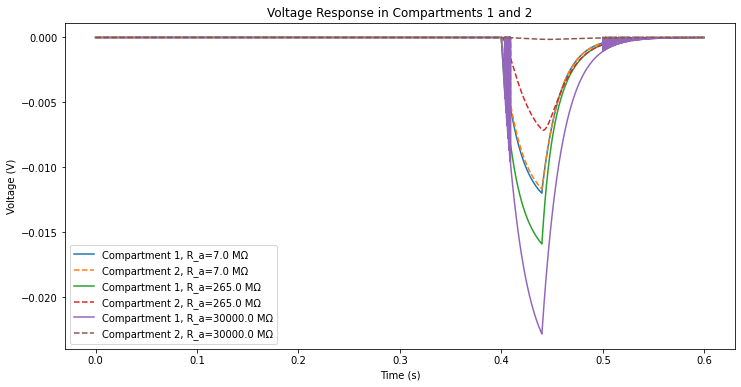

In [6]:
### YOUR CODE HERE

# Plotting the results
plt.figure(figsize=(12, 6))
for R_a in R_a_values:
    plt.plot(time_axis, voltages[R_a][:, 1], label=f'Compartment 1, R_a={R_a/1e6} MΩ')
    plt.plot(time_axis, voltages[R_a][:, 2], label=f'Compartment 2, R_a={R_a/1e6} MΩ', linestyle='--')

plt.title('Voltage Response in Compartments 1 and 2')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(False)
plt.show()

### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> Briefly summarize the quantitative findings. How do you explain the results?
</div>

<b> Your Answer: </b>

<div class="alert alert-warning">
    
 ###   **Summary and Explanation**
    
1. **Voltage Trend**:
   - Across all R_a values, the voltage decreases over time, indicating a gradual dissipation of the input current's effect due to the membrane and axial resistances.

2. **Impact of Axial Resistance**:
   - As the axial resistance increases (from R_a = 7 MΩ to R_a = 30 GΩ), the ability of the current to flow between compartments decreases, resulting in larger voltage differences between them.
 
   - **For R_a = 7 MΩ**, the voltage values remain close across compartments, indicating strong coupling and easier current flow between compartments.
   - **At R_a = 265 MΩ**, the voltages show noticeable differences across compartments due to increased resistance.
   - **For R_a = 30 GΩ**, the voltage gradient is steepest because the current flow between compartments is minimal, and the voltage in compartment 2 is minimally influenced by the input current in compartment 1.
</div>

Finally, let's simulate the response to a sinusoidal input current

$$
I_e (t) = 
\begin{cases}
0, &  (j\neq j_e) \\
100pA  \sin(2\pi f t), &  (j = j_e)
\end{cases}.
$$

for $R_a = 300M\Omega$, $j_e = 1$ and different frequencies $f$. For $C_m$, $R_m$ and $E_m$, we use the same values as before.

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the sinusoidal input.
</div>

In [7]:
def sinusoidal_input(t, N, input_compartment, f):
    '''Implements the sinusoidal input function.

    Args:
        t: Time in miliseconds
        N: Number of compartments in the model
        input_compartment: Compartment in which the current is injected
        f: The frequency

    Returns:
        The input current at a given time as a np.array of length N
    '''

    ### YOUR CODE HERE ###
    
    I_e = np.zeros(N)  # Initialize input current array
    if input_compartment < N:
        I_e[input_compartment] = 100e-12 * np.sin(2 * np.pi * f * t)  # 100 pA sinusoidal current
    return I_e
    
    ### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> Simulate the time-dependent voltage in the compartments 1 and 2 for the frequencies
<ul>
  <li>1Hz</li>
  <li>2Hz</li>
  <li>5Hz</li>
  <li>10Hz</li>
  <li>20Hz</li>
  <li>50Hz</li>
  <li>100Hz</li>
  <li>200Hz</li>
  <li>500Hz</li>
  <li>1000Hz</li>
  <li>2000Hz.</li>
</ul>
Plot the voltage-response against time for $f=50$Hz.
    
After the system has settled into a sinusoidal response (e.g. $t > 1s$), plot the logarithm of the voltage amplitude (for both compartments 1 and 2) against the logarithm of the input frequency (Bode diagram).
   
</div>

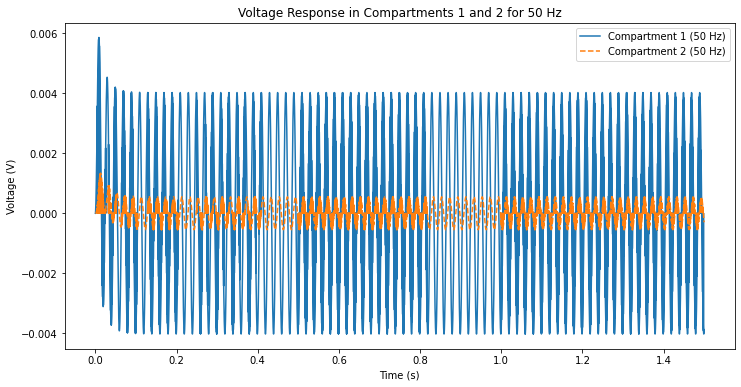

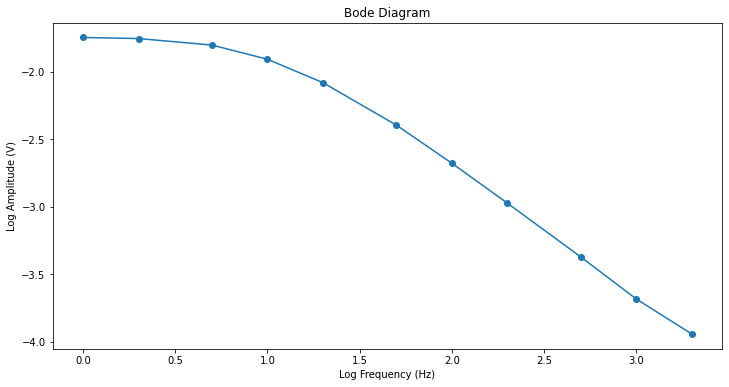

In [8]:
frequencies = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
t_start, t_stop, delta_t = 0., 1.5, 0.0001 # s
time_axis = np.arange(t_start, t_stop, delta_t)
R_a = 300e6 # Ohm

solution_over_time = np.zeros((len(frequencies), len(time_axis), N))


### YOUR CODE HERE

# Run the simulation for each frequency
for idx, f in enumerate(frequencies):
    V = np.zeros(N)  # Reset voltages for each frequency
    for t in time_axis:
        V[0] = V[1]  # Sealed end 1
        V[3] = V[2]  # Sealed end 2
        
        # Get the sinusoidal input current
        I_e = sinusoidal_input(t, N, 1, f)  # Inject current into compartment 1
        
        # Update the voltages for compartments 1 and 2
        V = surrounded_compartment_step(V, I_e, 1, E_m, C_m, R_m, R_a, delta_t)
        V = surrounded_compartment_step(V, I_e, 2, E_m, C_m, R_m, R_a, delta_t)
        
        # Store the results
        solution_over_time[idx, int(t / delta_t), :] = V

# Plot the voltage response for f = 50 Hz
plt.figure(figsize=(12, 6))
plt.plot(time_axis, solution_over_time[5, :, 1], label='Compartment 1 (50 Hz)')
plt.plot(time_axis, solution_over_time[5, :, 2], label='Compartment 2 (50 Hz)', linestyle='--')
plt.title('Voltage Response in Compartments 1 and 2 for 50 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(False)
plt.show()

# Bode plot for the logarithm of the voltage amplitude against the logarithm of the input frequency
# Calculate amplitudes for the Bode diagram
amplitudes = np.zeros(len(frequencies))
for idx in range(len(frequencies)):
    amplitudes[idx] = np.max(np.abs(solution_over_time[idx, int(1/delta_t):, 1]))  # Amplitude for compartment 1

# Plot the Bode diagram
log_frequencies = np.log10(frequencies)
log_amplitudes = np.log10(amplitudes)

plt.figure(figsize=(12, 6))
plt.plot(log_frequencies, log_amplitudes, marker='o')
plt.title('Bode Diagram')
plt.xlabel('Log Frequency (Hz)')
plt.ylabel('Log Amplitude (V)')
plt.grid(False)
plt.show()

### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> How do you interpret the Bode diagram?
</div>

<b> Your Answer: </b> 

<div class="alert alert-warning"> 
As the log frequency increases (moving right on the x-axis), the log amplitude decreases, indicating that the system's response diminishes at higher frequencies. This behavior is likely due to the membrane capacitance, which acts as a low-pass filter. The point where the curve starts to slope downward marks the cutoff frequency, beyond which higher-frequency signals are increasingly attenuated, typically related to the system’s time constant.
    </div>